<a href="https://colab.research.google.com/github/nisharajupal/-Assignment-09-Association_Rules/blob/main/Assignment_09_Association_Rules_Movies_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-09_Association Rules_Movies_data
##Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [1]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
movie = pd.read_csv("/content/my_movies.csv")

In [3]:
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df=movie.drop(movie.columns[[0,1,2,3,4]],axis=1,inplace=True)
# Remove all columns between column index 1 to 3
#df.drop(df.iloc[:, 1:3], inplace = True, axis = 1)
movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [5]:
df= pd.get_dummies(movie)
#df.drop (columns=['unnamed','V1','V2','V3','V4']) 
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


#Apriori Algo

In [6]:
frequent_itemsets = apriori(df, min_support=0.10, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(Sixth Sense, Harry Potter1, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [8]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,1
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,1
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,1
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,1
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,1
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
246,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
247,(LOTR2),"(Sixth Sense, Harry Potter1, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
248,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1


#Records with Length 1 Support>=0.10

In [9]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [10]:
rules[ (rules['antecedent_len'] ==1 ) &
       (rules['confidence'] >= 1.0) &
       (rules['lift'] > 1.2 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
11,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,1
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,1
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,1
17,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,1
19,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,1
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1
31,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,1
35,(Braveheart),(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf,1
38,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,1


In [11]:
rules.sort_values('support',ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,1
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,1
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,1
40,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2


#Length 2 Support >=0.10

In [12]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
10,0.5,"(Sixth Sense, Gladiator)",2
11,0.1,"(Sixth Sense, LOTR1)",2
12,0.1,"(Sixth Sense, Harry Potter1)",2
13,0.4,"(Sixth Sense, Patriot)",2
14,0.1,"(Sixth Sense, LOTR2)",2
15,0.1,"(Sixth Sense, LOTR)",2
16,0.2,"(Sixth Sense, Green Mile)",2
17,0.6,"(Gladiator, Patriot)",2
18,0.1,"(Gladiator, LOTR)",2
19,0.1,"(Gladiator, Braveheart)",2


In [13]:
rules[ (rules['antecedent_len'] ==2 ) &
       (rules['confidence'] >= 0.8) &
       (rules['lift'] > 1.2 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
40,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.10,2.0,2
41,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,2
47,"(Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,2
48,"(Gladiator, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,2
54,"(Gladiator, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,2
...,...,...,...,...,...,...,...,...,...,...
239,"(Harry Potter1, LOTR2)","(Sixth Sense, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
240,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
241,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
242,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2


#Length= 3 Support>=0.1

In [14]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.1)]

,support,itemsets,length
30,0.4,"(Sixth Sense, Gladiator, Patriot)",3
31,0.1,"(Sixth Sense, Gladiator, LOTR)",3
32,0.1,"(Sixth Sense, Gladiator, Green Mile)",3
33,0.1,"(Sixth Sense, Harry Potter1, LOTR1)",3
34,0.1,"(Sixth Sense, LOTR2, LOTR1)",3
35,0.1,"(Sixth Sense, Green Mile, LOTR1)",3
36,0.1,"(Sixth Sense, Harry Potter1, LOTR2)",3
37,0.1,"(Sixth Sense, Harry Potter1, Green Mile)",3
38,0.1,"(Sixth Sense, LOTR2, Green Mile)",3
39,0.1,"(Sixth Sense, LOTR, Green Mile)",3


#Antecedent Length= 3

In [16]:
rules[ (rules['antecedent_len'] ==3 ) &
       (rules['confidence'] >= 0.8) &
       (rules['lift'] > 1.2 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
136,"(Sixth Sense, Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
137,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf,3
138,"(Sixth Sense, LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,3
139,"(Gladiator, LOTR, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
150,"(Sixth Sense, Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
151,"(Sixth Sense, Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
152,"(Sixth Sense, LOTR2, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
153,"(Harry Potter1, LOTR2, LOTR1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
164,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
165,"(Sixth Sense, Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3


#Length 4 Support >=0.1

In [17]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.1)]

,support,itemsets,length
46,0.1,"(Sixth Sense, Gladiator, LOTR, Green Mile)",4
47,0.1,"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",4
48,0.1,"(Sixth Sense, Harry Potter1, Green Mile, LOTR1)",4
49,0.1,"(Sixth Sense, LOTR2, Green Mile, LOTR1)",4
50,0.1,"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",4
51,0.1,"(Harry Potter1, Green Mile, LOTR2, LOTR1)",4


#Forming rules for entire dataset

In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(Sixth Sense, Harry Potter1, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [19]:
df1=rules[ (rules['lift'] >=1.2) & (rules['support'] >= 0.20) & (rules['confidence']>=0.50)]
df1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
41,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
44,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
45,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [20]:
df2=rules[ (rules['lift'] >=1.4) & (rules['support'] >= 0.20) & (rules['confidence']>=0.50)]
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
41,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
44,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


#Plotting

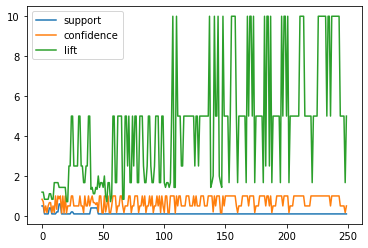

In [21]:
import matplotlib as plt
rules[['support', 'confidence','lift' ]].plot()